# Military vehicles classifiction

### Libraries and Explanation

#### 1. TensorFlow (`tensorflow`)
- A popular deep learning framework for building and training machine learning models.
- Provides high-level APIs for creating neural networks and handling large-scale data.
- **Installation**:  
  ```bash
  pip install tensorflow
  ```

#### 2. Keras (`tensorflow.keras`)
- A high-level API integrated into TensorFlow for building neural networks.
- Simplifies the process of defining, training, and evaluating deep learning models.

#### 3. ImageDataGenerator (`tensorflow.keras.preprocessing.image`)
- Used to generate batches of image data with real-time data augmentation.
- Useful for expanding datasets by applying transformations like rotations, flips, and rescaling.

#### 4. PIL (Python Imaging Library)
- A library for image processing tasks such as opening, manipulating, and saving images.
- Available as `Pillow` (modern fork of PIL).
- **Installation**:  
  ```bash
  pip install pillow
  ```

#### 5. NumPy (`numpy`)
- A fundamental library for numerical computations in Python.
- Provides support for arrays, matrices, and a collection of mathematical functions.
- **Installation**:  
  ```bash
  pip install numpy
  ```

#### 6. Matplotlib (`matplotlib`)
- A library for creating static, animated, and interactive visualizations.
- Used for plotting data, visualizing training metrics, or displaying images.
- **Installation**:  
  ```bash
  pip install matplotlib
  ```

#### 7. OS (`os`)
- A Python standard library for interacting with the operating system.
- Used to navigate file directories and handle file paths.
- No installation needed; it's included with Python.
- 
#### 8. Seaborn (`seaborn`)
- A Python library built on top of `matplotlib` for creating informative and attractive statistical graphics.
- Provides high-level functions for creating complex visualizations like heatmaps, bar plots, and violin plots with minimal code.
- Enhances `matplotlib` plots by providing built-in themes, color palettes, and more.
- To install, use:
  ```bash
  pip install seaborn
  ```
#### 9. Time (`time`)
- A Python standard library for measuring and manipulating time-related tasks.
- Provides tools to work with timestamps, delays, and performance measurements.
- No installation needed; it's included with Python.
---

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import seaborn as sns
import time

## Dataset load
- **`ImageDataGenerator`**: Preprocesses image data by normalizing pixel values (`rescale=1./255`).
- **`flow_from_directory`**: Loads images from directories, resizes them to `(256, 256)`, converts to grayscale, and processes them in batches of 32.
- **`class_mode='categorical'`**: Encodes labels as one-hot vectors for multi-class classification.
- **Use**: Prepares training and testing datasets for a deep learning model.

In [7]:
train_dataGen = ImageDataGenerator(rescale=1./255)
test_dataGen = ImageDataGenerator(rescale=1./255)

train_dir = 'data/train'
test_dir = 'data/test'

train_generator = train_dataGen.flow_from_directory(
    directory=train_dir,
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_dataGen.flow_from_directory(
    directory = test_dir,
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

Found 10414 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


## Dataset preview
The code displays images from the `train_generator` and `test_generator` along with their predicted labels. 

- It shows a single image from each generator with its one-hot encoded label and the predicted class name.
- For the test generator, it displays a grid of 25 images, labeling each image with its true one-hot encoded label and predicted class based on the maximum value in the labels array.

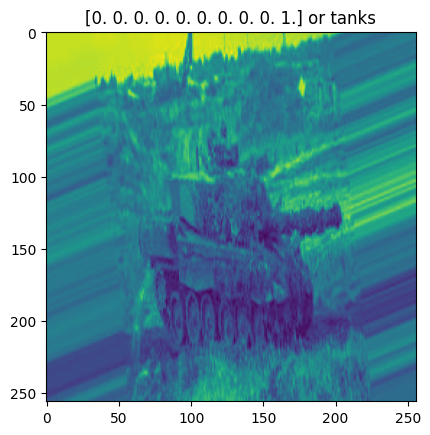

In [8]:
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())
label_text = class_names[np.argmax(labels[10])]
plt.imshow(images[10])  
plt.title(f'{labels[10]} or {label_text}')  
plt.show()

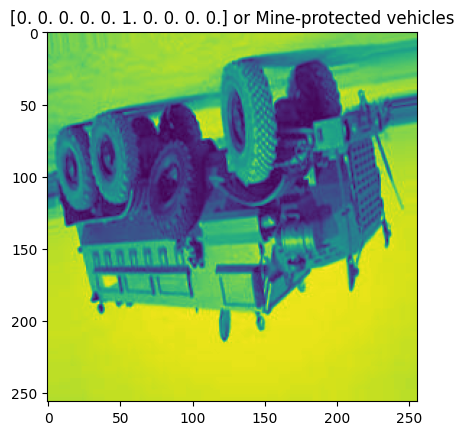

In [13]:
images, labels = next(test_generator)
class_names = list(test_generator.class_indices.keys())
label_text = class_names[np.argmax(labels[10])]
plt.imshow(images[10])  
plt.title(f'{labels[10]} or {label_text}')  
plt.show()

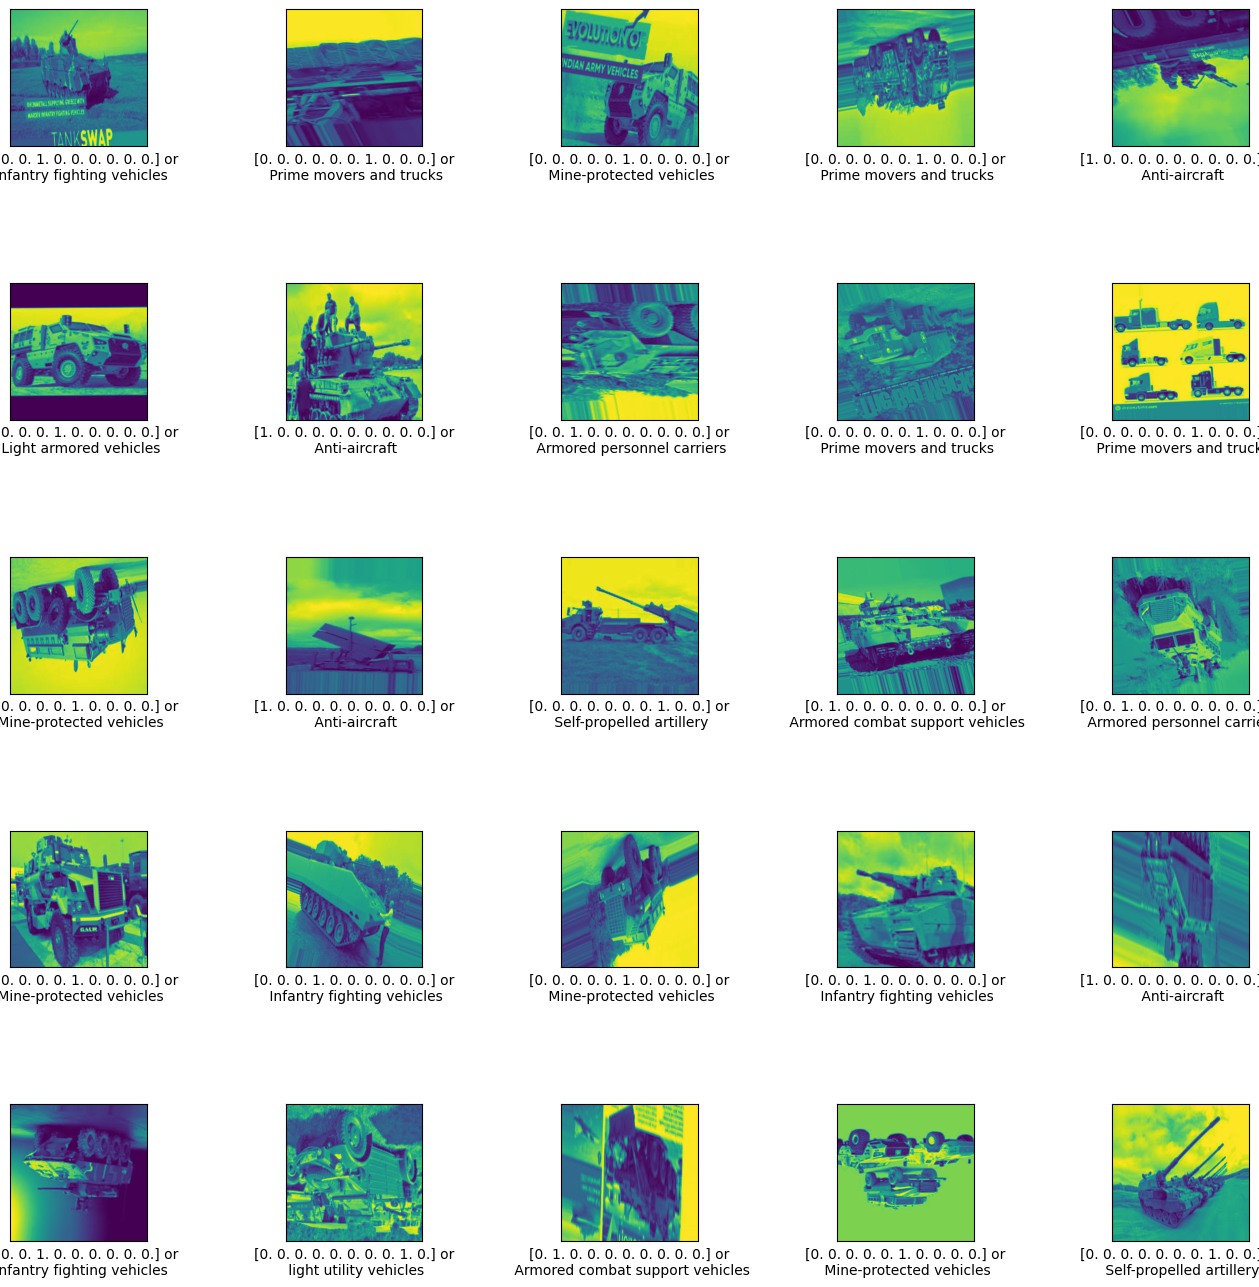

In [14]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(f'{labels[i]} or\n {class_names[np.argmax(labels[i])]}')
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

## Model
The model is a Convolutional Neural Network (CNN) built using Keras' Sequential API. Here's a breakdown of each layer:

### Layers

1. **Input Layer**: 
   - `Input(shape=(256, 256, 1))`: The model expects input images of size 256x256 pixels with a single channel (grayscale).

2. **Convolutional Layers**: 
   - `Conv2D(32, (8,8), activation='relu', padding='same')`: 32 filters, each of size 8x8, using ReLU activation and same padding to preserve the image size.
   - `Conv2D(64, (6,6), activation='relu', padding='same')`: 64 filters, each of size 6x6.
   - `Conv2D(128, (4,4), activation='relu', padding='same')`: 128 filters, each of size 4x4.
   - `Conv2D(128, (3,3), activation='relu', padding='same')`: Another set of 128 filters, each of size 3x3.

3. **Batch Normalization**: 
   - `BatchNormalization()`: Normalizes the activations to improve training speed and stability.

4. **MaxPooling Layers**: 
   - `MaxPooling2D(2,2)`: Reduces the spatial dimensions by taking the maximum value from each 2x2 region.

5. **Dropout Layers**:
   - `Dropout(0.2)`: Randomly drops 20% of neurons during training to prevent overfitting.
   - `Dropout(0.3)`: In later layers, 30% of neurons are dropped.

6. **Flatten Layer**: 
   - `Flatten()`: Converts the 2D feature maps into a 1D vector to feed into the fully connected layers.

7. **Fully Connected (Dense) Layers**:
   - `Dense(1024, activation='relu')`: Fully connected layer with 1024 neurons and ReLU activation.
   - `Dense(512, activation='relu')`: Fully connected layer with 512 neurons.
   - `Dense(256, activation='relu')`: Fully connected layer with 256 neurons.

8. **Output Layer**: 
   - `Dense(train_generator.num_classes, activation='softmax')`: Final output layer with softmax activation to produce class probabilities, where the number of units equals the number of classes in the dataset.

This architecture aims to classify images into multiple categories by learning spatial hierarchies and then flattening and classifying the features extracted through convolutional layers.


In [9]:
model = Sequential([
    Input(shape=(256, 256, 1)),
    Conv2D(32, (8,8), activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.2),
    
    Conv2D(64, (6,6), activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(128, (4,4), activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(128, (3,3), activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Flatten(),
    
    Dense(1024, activation = 'relu'),
    Dropout(0.3),
    
    Dense(512, activation = 'relu'),
    Dropout(0.3),
    
    Dense(256, activation = 'relu'),
    Dropout(0.3),
    
    Dense(train_generator.num_classes, activation = 'softmax')
])

### Compile

The `model.compile()` function configures the model for training. Here's a breakdown of each parameter:

1. **optimizer**: 
   - `'adam'`: The Adam optimizer is used here. It combines the benefits of both the SGD (Stochastic Gradient Descent) and RMSProp optimizers, and it adapts the learning rate during training. It's popular for its efficiency and ease of use.

2. **loss**: 
   - `'categorical_crossentropy'`: This is the loss function used for multi-class classification problems. It measures the difference between the true labels and the predicted probabilities. The formula for categorical crossentropy is:

   $$ L = - \sum_{i=1}^{C} y_i \log(p_i) $$

   Where:
   - $L$ is the loss.
   - $C$ is the number of classes.
   - $y_i$ is the true probability distribution (usually 0 or 1).
   - $p_i$ is the predicted probability for each class.

   The lower the value of this loss function, the better the model's predictions match the actual labels.


3. **metrics**:
   - `['accuracy']`: This specifies the metric to evaluate the model's performance during training and testing. Here, 'accuracy' will track the proportion of correctly predicted labels.


In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### Fitting

The `fit()` function is used to train the model. Here's a breakdown of the parameters used in the code:

- `train_generator`: This is the data generator for training. It yields batches of images and labels from the training dataset.
  
- `steps_per_epoch`: This specifies how many batches to process before declaring one epoch finished. It is set to the number of samples in the training dataset (`train_generator.samples`), so the model will go through all the training samples once per epoch.

- `epochs`: The number of times the entire dataset will be passed through the model during training. In this case, it is set to 10 epochs.

- `validation_data`: This is the data generator for validation. It yields batches of images and labels from the validation (or test) dataset.

- `validation_steps`: Similar to `steps_per_epoch`, this specifies how many batches to process for validation before moving to the next epoch. It is set to the number of samples in the test dataset (`test_generator.samples`), so the model will validate using all the test samples once per epoch.

The `fit()` function trains the model on the provided data, adjusting the weights to minimize the loss function and improve the model's performance.

In [11]:
start_time = time.time()

history = model.fit(
    train_generator, 
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size
)

end_time = time.time()
elapsed_time = end_time - start_time
elapsed_hours = elapsed_time / 3600  
print(f"Time taken to train the model: {elapsed_hours:.2f} hours")

Epoch 1/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 217s 662ms/step - accuracy: 0.1148 - loss: 2.3051 - val_accuracy: 0.1538 - val_loss: 2.2482
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.2188 - loss: 2.2101 - val_accuracy: 0.4286 - val_loss: 2.2358
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 213s 654ms/step - accuracy: 0.1763 - loss: 2.2179 - val_accuracy: 0.1945 - val_loss: 2.1910
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step - accuracy: 0.2500 - loss: 2.1897 - val_accuracy: 0.2857 - val_loss: 2.1226
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 213s 654ms/step - accuracy: 0.2414 - loss: 2.0915 - val_accuracy: 0.2527 - val_loss: 2.0861
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 227us/step - accuracy: 0.1562 - loss: 2.1398 - val_accuracy: 0.2857 - val_loss: 1.9738
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 213s 656ms/step - accuracy: 0.3812 - loss: 1.7735 - val_accuracy: 0.3090 - val_loss: 1.9868
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 229us/step - accuracy: 0.3438 - loss: 1

### Evaluation

The `evaluate()` function is used to assess the model's performance on the dataset. Here's a breakdown of the code:

- `train_generator`: This is the data generator for the training dataset. The model will evaluate its performance on the training data by calculating the loss and accuracy.

- `test_generator`: This is the data generator for the test dataset. The model will evaluate its performance on the test data by calculating the loss and accuracy.

The `evaluate()` function returns two values:
1. `train_loss` and `test_loss`: These represent the loss of the model on the respective datasets (training and testing).
2. `train_accuracy` and `test_accuracy`: These represent the accuracy of the model on the respective datasets.

- The `print()` statements display the accuracy of the model on both the training and test datasets, formatted to two decimal places.

This function is useful to check how well the model is performing after training and provides insights into whether it is overfitting or underperforming.

In [12]:
train_loss, train_accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {train_accuracy:.2f}")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

326/326 ━━━━━━━━━━━━━━━━━━━━ 61s 188ms/step - accuracy: 0.9993 - loss: 0.0192
Train Accuracy: 1.00
117/117 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.5329 - loss: 2.2691
Test Accuracy: 0.53


### Save

The `model.save()` function is used to save the trained model to a file so that it can be loaded and used later without needing to retrain.

- `'models/military_vehicle_classifier_10_classes_BIG.h5'`: This is the file path where the model will be saved. The model is saved with the `.h5` extension, which is a standard format for storing Keras models (HDF5 format).

By saving the model:
- You can persist the model's architecture, weights, and optimizer state.
- It allows for easy reloading and inference without retraining, which is particularly useful for deploying the model to production.

Once saved, you can load the model with `keras.models.load_model('path_to_model')` and use it to make predictions.

In [ ]:
model.save('models/military_vehicle_classifier_10_classes_BIG.h5')
#model.save('models/military_vehicle_classifier_10_classes_MODEL.keras')

### Testing with user input

- The image at `image_path` is loaded, resized to 256x256, and normalized (divided by 255).
- The pre-trained model is loaded from `'models/military_vehicle_classifier_10_classes_MODEL.h5'`.
- The image is passed through the model to make a prediction.
- The predicted class index is extracted, and the corresponding class label is printed.
- The image is displayed after reversing the normalization for visualization.
- The probability distribution is shown.

In [4]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

Softmax is used in multi-class classification to convert raw output scores (logits) into probabilities, which sum up to 1. The probability of each class is determined by the formula:
$$ P(y_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}} $$
Where:
- $P(y_i)$ is the probability of class $i$,
- $z_i$ is the raw score (logit) for class $i$,
- $N$ is the total number of classes.

The Softmax function helps the model choose the class with the highest probability.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
The uploaded image is predicted to be: tanks


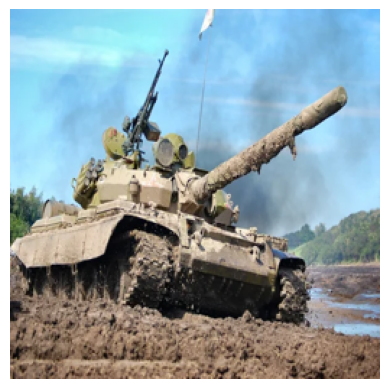

In [5]:
#image_path = 'user_data/tanks_0_2022.jpeg'
image_path = 'user_data/tank4.jpg'

model = tf.keras.models.load_model('models/military_vehicle_classifier_10_classes.h5')
image_data = load_and_preprocess_image(image_path)
prediction = model.predict(image_data)
class_labels = list(test_generator.class_indices.keys())
predicted_class_index = np.argmax(prediction, axis=1)
print(f"The uploaded image is predicted to be: {class_labels[predicted_class_index[0]]}")

img_array = image_data[0] * 255.0  
img_array = np.clip(img_array, 0, 255).astype(np.uint8) 

plt.imshow(img_array)
plt.axis('off') 
plt.show()

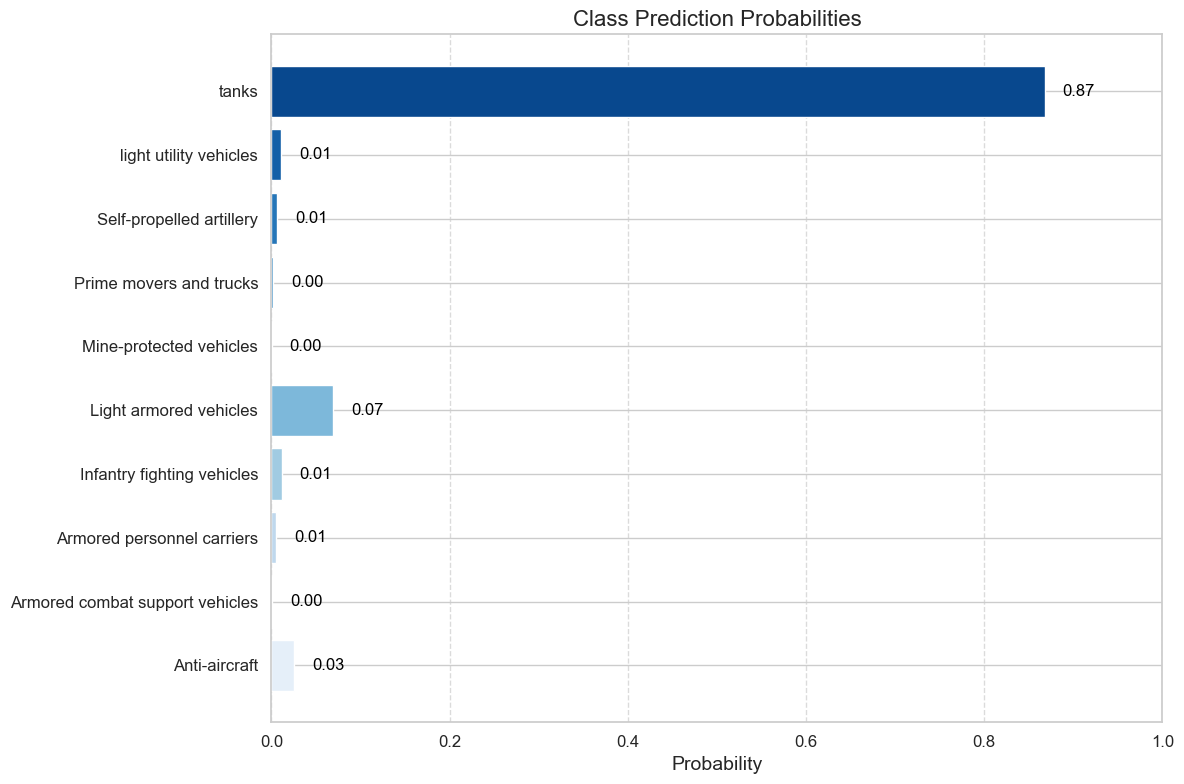

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
bars = plt.barh(class_labels, prediction[0], color=sns.color_palette("Blues", len(class_labels)))

plt.xlabel('Probability', fontsize=14)
plt.title('Class Prediction Probabilities', fontsize=16)

plt.xlim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.show()


## Credit
Data taken from https://www.kaggle.com/datasets/amanrajbose/millitary-vechiles